In [103]:
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.metrics import accuracy_score

In [104]:
que = pd.read_excel("C:\\Users\\User\\PycharmProjects\\DSCT Batch\\Natural Language Processing\\Quora Question Pair\\QPS 60000.xlsx")
que.head()

question1  \
0  What is the step by step guide to invest in sh...   
1  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2  How can I increase the speed of my internet co...   
3  Why am I mentally very lonely? How can I solve...   
4  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...           0.0  
1  What would happen if the Indian government sto...           0.0  
2  How can Internet speed be increased by hacking...           0.0  
3  Find the remainder when [math]23^{24}[/math] i...           0.0  
4            Which fish would survive in salt water?           0.0

In [105]:
que.head(2)

question1  \
0  What is the step by step guide to invest in sh...   
1  What is the story of Kohinoor (Koh-i-Noor) Dia...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...           0.0  
1  What would happen if the Indian government sto...           0.0

In [106]:
que.count()

question1       60000
question2       60000
is_duplicate    60000
dtype: int64

In [107]:
df = que.sample(40000, random_state=2)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 10327 to 56661
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   question1     40000 non-null  object 
 1   question2     40000 non-null  object 
 2   is_duplicate  40000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [109]:
df['is_duplicate'].value_counts()

0.0    25084
1.0    14916
Name: is_duplicate, dtype: int64

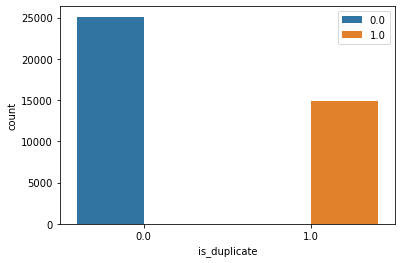

In [110]:
sns.countplot(x="is_duplicate",hue="is_duplicate",data=df)
plt.legend(bbox_to_anchor=(1,1))

In [111]:
unsim = df[df['is_duplicate'] == 0].sample(14916)
sim = df[df['is_duplicate'] == 1].sample(14916)

In [112]:
df = pd.concat([unsim,sim])

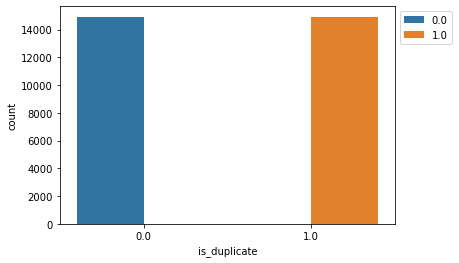

In [113]:
sns.countplot(x="is_duplicate",hue="is_duplicate",data=df)
plt.legend(bbox_to_anchor=(1,1))

In [114]:
df.columns

Index(['question1', 'question2', 'is_duplicate'], dtype='object')

In [115]:
# nltk.download('stopwords')
lemmatizer=WordNetLemmatizer()
stop_word=set(stopwords.words('english'))

In [116]:
questions = list(df['question1']) + list(df['question2'])

In [117]:
type(questions)

list

In [118]:
# import nltk
# nltk.download('omw-1.4')
corpus=[]
for i in range(len(questions)):
    sent = re.sub('[^a-zA-Z]', ' ', questions[i])
    sent = sent.lower()
    sent = " ".join([lemmatizer.lemmatize(word) for word in str(sent).split()])
    sent = " ".join([word for word in str(sent).split() if(word not in stop_word)])
    corpus.append(sent)
corpus[:5]

['interesting product innovation evolution petroleum coming',
 'dr prescribes adderall mg phycitrist prescribes adderall mg still get filled pharmacy month',
 'current chancellor germany',
 'zero divided',
 'strange experience people haunted location japan']

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv=TfidfVectorizer(max_features=5000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(corpus).toarray(),2)


In [120]:
temp_1 = pd.DataFrame(q1_arr)
temp_2 = pd.DataFrame(q2_arr)
temp_df = pd.concat([temp_1,temp_2], axis=1)


In [121]:
temp_df

0     1     2     3     4     5     6     7     8     9     ...  4990  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
29827   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
29828   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
29829   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
29830   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
29831   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       4991  4992      4993  4994  4995  4996  4997  4998  4999  
0       0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
1       0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
2       0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
3       0.0   0.0  0.642104   0.0   0.0   0.0   0.0   0.0   0.0  
4       0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...       ...   ...   ...   ...   ...   ...   ...  
29827   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
29828   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
29829   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
29830   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  
29831   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  

[29832 rows x 10000 columns]

In [122]:
X=temp_df
y = df['is_duplicate']

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [124]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def model_Eval(y_test,y_pred):
    
    #Step 1: Accuacy, Error, PS, RS, F1S:
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy of model is:",acc)
    print("Error in model is: ",1-acc)
    print("Precision score of model is: ",precision_score(y_test,y_pred,average='weighted'))
    print("Recall score of model is: ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 Score of model is: ",f1_score(y_test,y_pred,average='weighted'))
    print()

    #Step 2: Confusion Matrix:
    print("____Confusion Matric____")
    cm = confusion_matrix(y_test,y_pred)
    print(cm)

    #Step 3: Heatmap: 

    plt.figure(figsize=(10,5))
    sns.heatmap(cm,annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

#     #Step 4: Classification report: 

#     lab = ['setosa', 'versicolor','virginica']
#     print(classification_report(y_test,y_pred,target_names = lab))

68.40958605664488
Accuracy of model is: 0.6840958605664488
Error in model is:  0.3159041394335512
Precision score of model is:  0.6846115274764066
Recall score of model is:  0.6840958605664488
F1 Score of model is:  0.6840722418008657

____Confusion Matric____
[[2052  882]
 [1003 2030]]


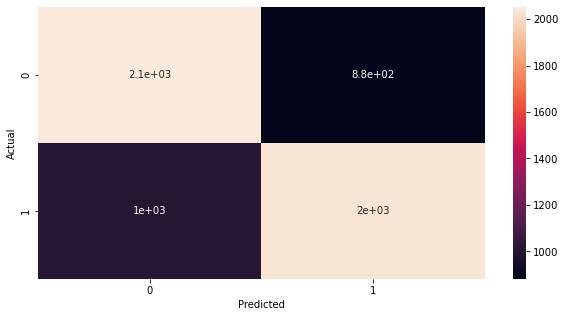

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
add_model = LogisticRegression()
add_model.fit(X_train,y_train)
y_pred = add_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

55.03603150661974
Accuracy of model is: 0.5503603150661974
Error in model is:  0.4496396849338026
Precision score of model is:  0.568403105061796
Recall score of model is:  0.5503603150661974
F1 Score of model is:  0.5084609322721033

____Confusion Matric____
[[ 748 2186]
 [ 497 2536]]


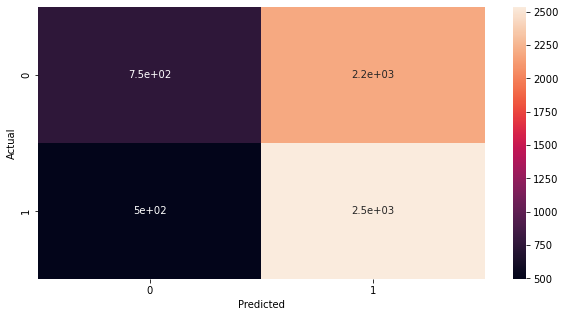

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Final Model for k=3
 #Step 1: Creating Model
ML_Model = KNeighborsClassifier(n_neighbors=3,p=2)

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

Model created
61.32521974306964
Accuracy of model is: 0.6132521974306964
Error in model is:  0.38674780256930363
Precision score of model is:  0.6273879828753919
Recall score of model is:  0.6132521974306964
F1 Score of model is:  0.6038202239944275

____Confusion Matric____
[[343 404]
 [168 564]]


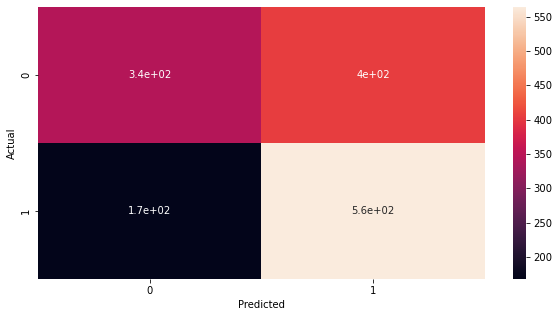

In [50]:
from sklearn.naive_bayes import GaussianNB

ML_Model = GaussianNB()
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

Model created
64.65560583207642
Accuracy of model is: 0.6465560583207642
Error in model is:  0.35344394167923576
Precision score of model is:  0.6466232046428192
Recall score of model is:  0.6465560583207642
F1 Score of model is:  0.6461964748811487

____Confusion Matric____
[[1806 1128]
 [ 981 2052]]


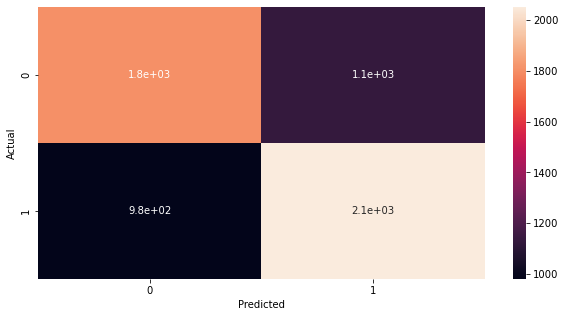

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

ML_Model = DecisionTreeClassifier()
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

Model created
62.22557399027987
Accuracy of model is: 0.6222557399027987
Error in model is:  0.3777442600972013
Precision score of model is:  0.649750822384209
Recall score of model is:  0.6222557399027987
F1 Score of model is:  0.6070546154609814

____Confusion Matric____
[[2420  514]
 [1740 1293]]


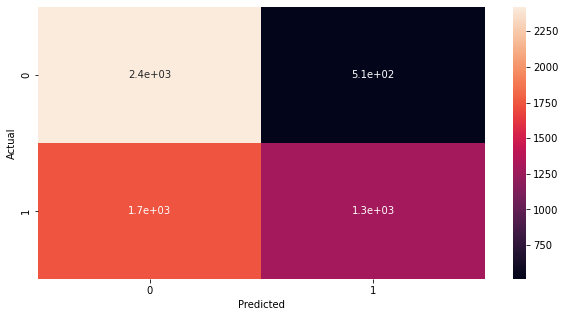

In [128]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ML_Model = AdaBoostClassifier(random_state=96)
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)

Model created
60.164236634824874
Accuracy of model is: 0.6016423663482487
Error in model is:  0.39835763365175125
Precision score of model is:  0.6596590398969991
Recall score of model is:  0.6016423663482487
F1 Score of model is:  0.5664128521462762

____Confusion Matric____
[[2623  311]
 [2066  967]]


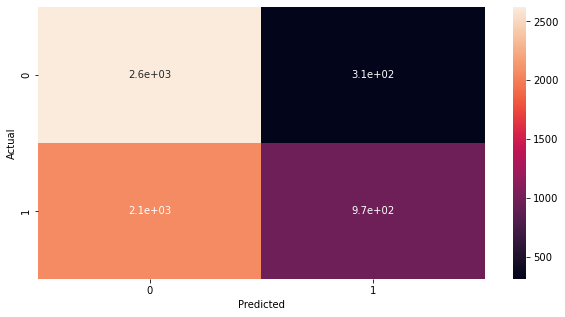

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ML_Model = RandomForestClassifier(max_depth=2)
print("Model created")

 #Step 2: Training Model
ML_Model.fit(X_train,y_train)

 #Step 3: Predicting Model
y_pred = ML_Model.predict(X_test)

 #Step 4: Accuracy of Model
acc = accuracy_score(y_test,y_pred)
print(acc*100)
model_Eval(y_test,y_pred)